### Statistical Learning for Data Science 2 (229352)
#### Instructor: Donlapark Ponnoprat

#### [Course website](https://donlapark.pages.dev/229352/)

## Lab #6

## Support Vector Machines (SVM)

[SVM module documentation](https://scikit-learn.org/stable/modules/svm.html#svm)

[LinearSVC documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC)

[SVC documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC  # fast but only linear
from sklearn.svm import SVC  # slower but can do kernels

In [2]:
# Load the iris data
iris = datasets.load_iris()
X = iris.data[:, 2:]
y = iris.target

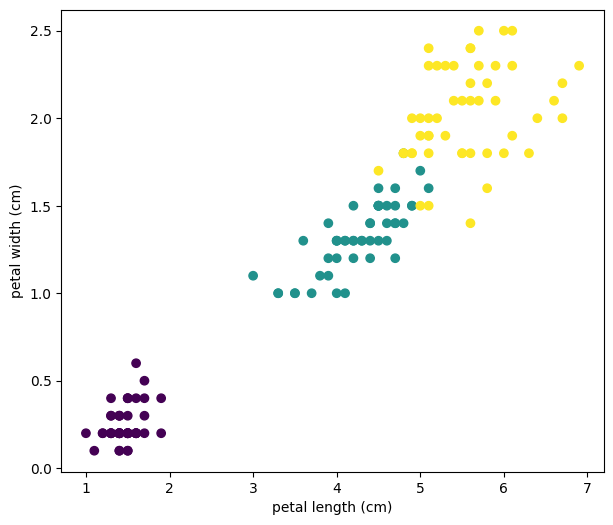

In [3]:
# Plot the data
plt.figure(figsize=(7,6))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
plt.show()

ตัวแปรต้น x เรามี 2 ตัว petal width (cm), petal length (cm)

#### In this problem, you'll use support vector machines to classify the Iris data

#### The following function helps you plot the decision boundary.

In [4]:
# Plot the decision boundaries
def plot_decision_boundary(clf, X, y):
    h = 0.005  # Boundary lines' resolution
    x_min, x_max = X[:,0].min() - 10*h, X[:,0].max() + 10*h
    y_min, y_max = X[:,1].min() - 10*h, X[:,1].max() + 10*h
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(7,6))
    plt.contourf(xx, yy, Z, alpha=0.25)  # Background
    plt.contour(xx, yy, Z, colors='k', linewidths=0.2)  # Boundary lines
    plt.scatter(X[:,0], X[:,1], c=y);  # Data points
    plt.xlabel(iris.feature_names[2])
    plt.ylabel(iris.feature_names[3])

#### Exercise 1. Split the data into training set and test set.

In [6]:
#TODO
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Exercise 2. Learn a linear SVM classifier using sklearn.svm.LinearSVC. You will need to set `loss='hinge'`.

#### Try different values of the tradeoff parameter: `C = 0.01, 0.1, 1.0, 10.0, 100.0` and use `plot_decision_boundary` to plot the decision boundary.

#### If you encounter `RuntimeError`, consider setting `max_iter=100000`

#### What is the effect of `C` on the decision boundary?

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


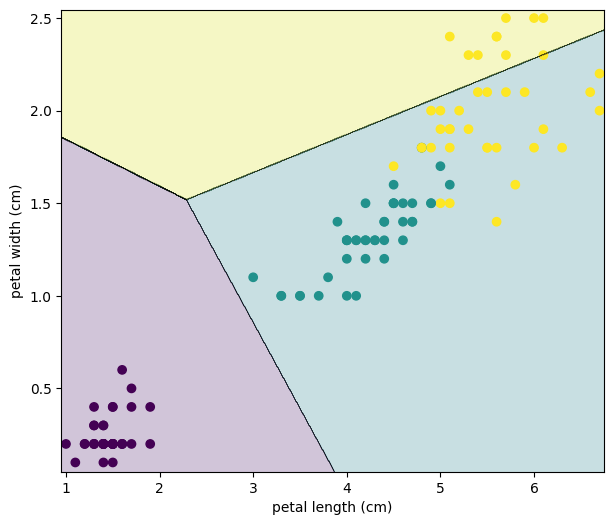

In [12]:
#TODO
lin_clf = LinearSVC(loss='hinge', C=0.01)
lin_clf.fit(X_train, y_train)
plot_decision_boundary(lin_clf, X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


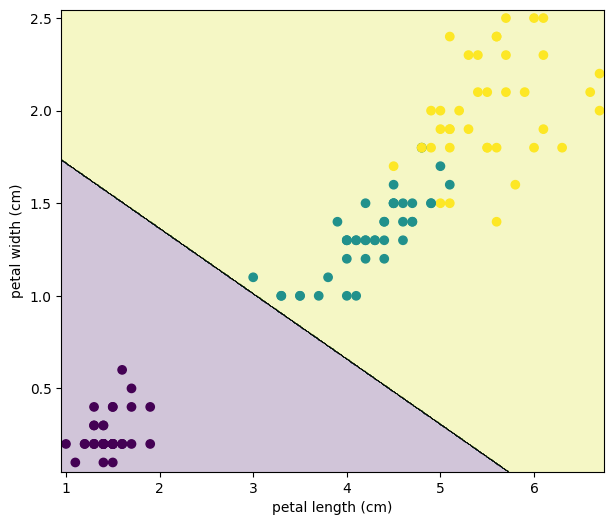

In [13]:
lin_clf = LinearSVC(loss='hinge', C=0.1)
lin_clf.fit(X_train, y_train)
plot_decision_boundary(lin_clf, X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


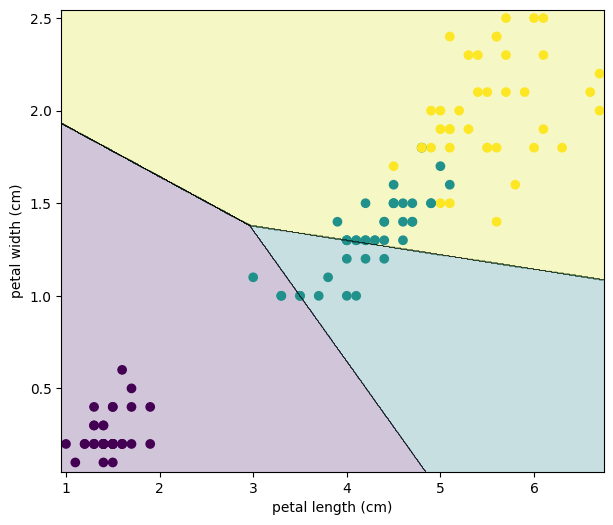

In [14]:
lin_clf = LinearSVC(loss='hinge', C=1.0)
lin_clf.fit(X_train, y_train)
plot_decision_boundary(lin_clf, X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


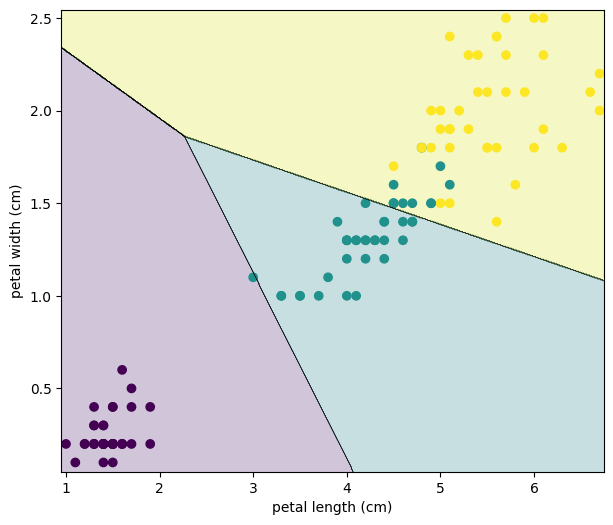

In [15]:
lin_clf = LinearSVC(loss='hinge', C=10.0)
lin_clf.fit(X_train, y_train)
plot_decision_boundary(lin_clf, X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


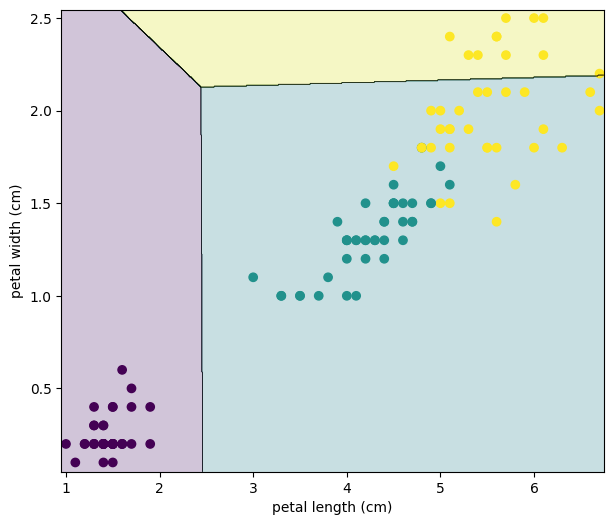

In [16]:
lin_clf = LinearSVC(loss='hinge', C=100.0)
lin_clf.fit(X_train, y_train)
plot_decision_boundary(lin_clf, X_train, y_train)

**จากการทดลองใช้ค่า C หลาย ๆ ค่า พบว่ายิ่งค่า C เพิ่มขึ้น จะมีการแบ่ง decision boundary ที่กว้างขึ้น
แต่ถ้าค่า C ยิ่งลดลง จะมีการแบ่ง decision boundary ที่แคบลง**

#### Exercise 3. Pick a value of `C` that you like. Then report the test error.

In [50]:
#TODO
# I chose c = 10.0 because it spliting the area pretty well
lin_clf = LinearSVC(loss='hinge', C=10.0)
lin_clf.fit(X_train, y_train)

# Report the test error with 1 - test accuracy (Result will fall in between 0-1)
print("Test error =", 1 - lin_clf.score(X_test, y_test)) # Test error = 0.09999999999999998 which is pretty low for a test error

Test error = 0.09999999999999998


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


#### Exercise 4. Now try kernel SVM with a quadratic kernel. You can do this with sklearn.svm.SVC, setting `kernel='rbf'` and `C = 1.0`.

#### Try different values of the tradeoff parameter: `gamma = 0.01, 0.1, 1.0, 10.0, 100.0` and use `plot_decision_boundary` to plot the decision boundary.

#### If you encounter `RuntimeError`, consider setting `max_iter=100000`

#### What is the effect of `gamma` on the decision boundary?

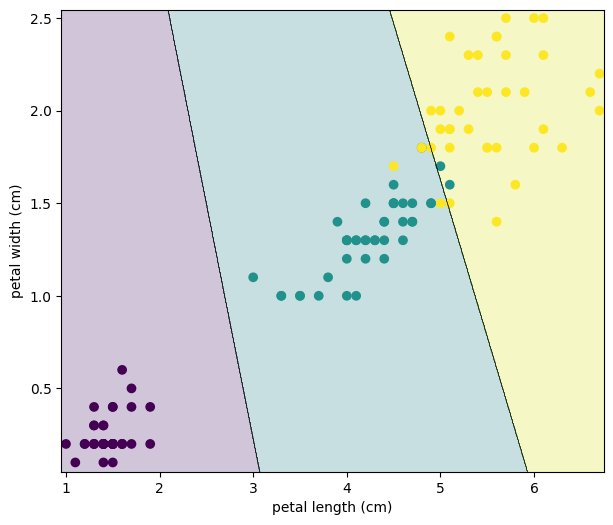

In [24]:
#TODO
svm_clf = SVC(kernel='rbf', C=1.0, gamma=0.01)
svm_clf.fit(X_train, y_train)
plot_decision_boundary(svm_clf, X_train, y_train)

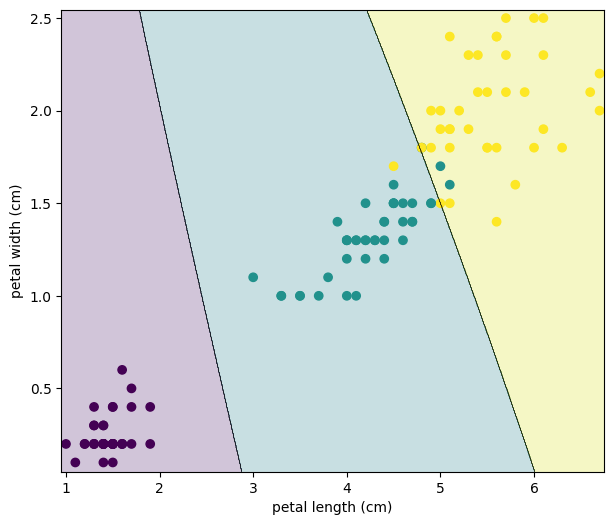

In [25]:
svm_clf = SVC(kernel='rbf', C=1.0, gamma=0.1)
svm_clf.fit(X_train, y_train)
plot_decision_boundary(svm_clf, X_train, y_train)

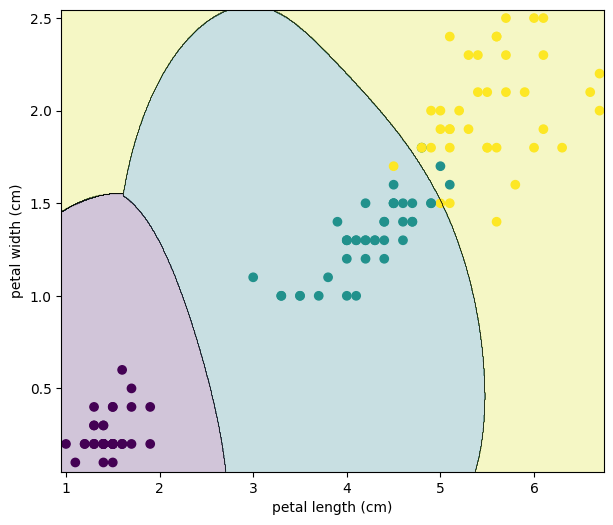

In [26]:
svm_clf = SVC(kernel='rbf', C=1.0, gamma=1.0)
svm_clf.fit(X_train, y_train)
plot_decision_boundary(svm_clf, X_train, y_train)

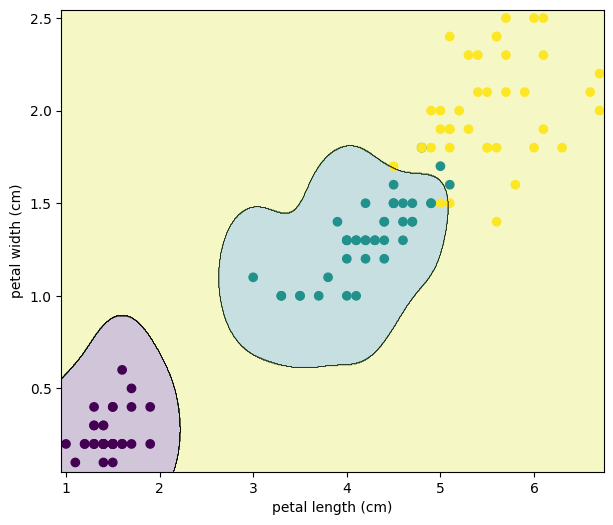

In [27]:
svm_clf = SVC(kernel='rbf', C=1.0, gamma=10.0)
svm_clf.fit(X_train, y_train)
plot_decision_boundary(svm_clf, X_train, y_train)

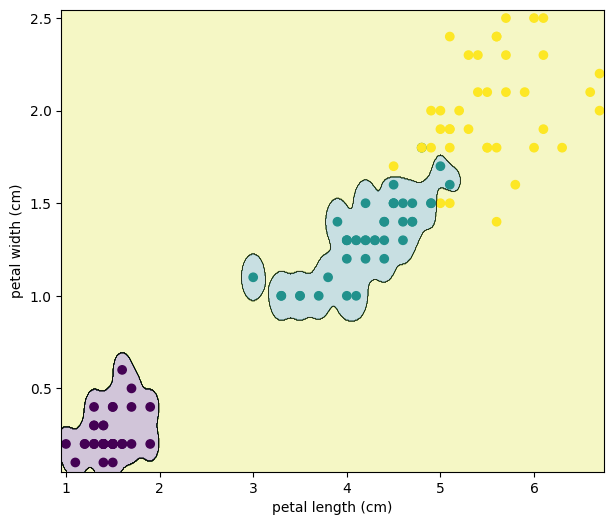

In [28]:
svm_clf = SVC(kernel='rbf', C=1.0, gamma=100.0)
svm_clf.fit(X_train, y_train)
plot_decision_boundary(svm_clf, X_train, y_train)

**จากการทดลองใช้ค่า gamma ที่แตกต่างกัน พบว่ายิ่งค่า gamma มากขึ้น จะมีการแบ่ง decision boundary ที่เจาะจงกลุ่มมากขึ้น แต่ถ้า gamma มึค่าที่ต่ำ จะมี decision boundary ที่แบ่งกันตามขอบกลุ่มซึ่งคล้ายบล็อก**

#### Exercise 5. Pick a value of `gamma` that you like. Then report the test error and the number of support vectors.

In [49]:
#TODO
# I chose gamma = 0.1 because it looks pretty well split
svm_clf = SVC(kernel='rbf', C=1.0, gamma=0.1)
svm_clf.fit(X_train, y_train)

# Report the test error with 1 - test accuracy (Result will fall in between 0-1)
print("Test error =", 1 - svm_clf.score(X_test, y_test)) # Test error = 0.0 (ไม่พบ Error)

# Report the number of support vectors
print("Number of support vectors =", len(svm_clf.support_vectors_)) # พบ support vectors อยู่ 45 ตัว

Test error = 0.0
Number of support vectors = 45


#### Exercise 6. Between Linear SVM and Kernel SVM, which model would you prefer to use for classification of Iris data?
1. Explain using test accuracy
2. Explaing using decision boundary plot

Test accuracy = 0.9


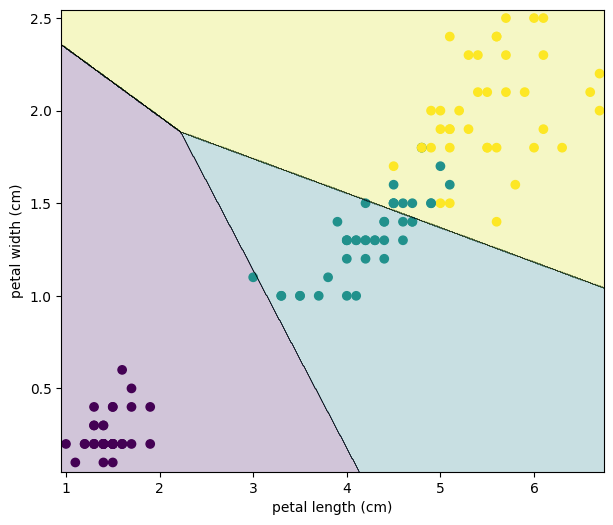

In [51]:
#TODO
# Linear SVM
# Explain using test accuracy
# ค่า C ที่เลือกล่าสุด คือ C = 10.0
test_accuracy = lin_clf.score(X_test, y_test)
print("Test accuracy =", test_accuracy)

# Explaing using decision boundary plot
plot_decision_boundary(lin_clf, X_train, y_train)

**Linear SVM มีค่า test accuracy ที่ค่อนข้างแม่นยำ และมีการแบ่ง decision boundary ที่แคบตามกลุ่มของข้อมูลที่แบ่งได้ (เมื่อค่า C ต่ำ)**

Test accuracy = 1.0


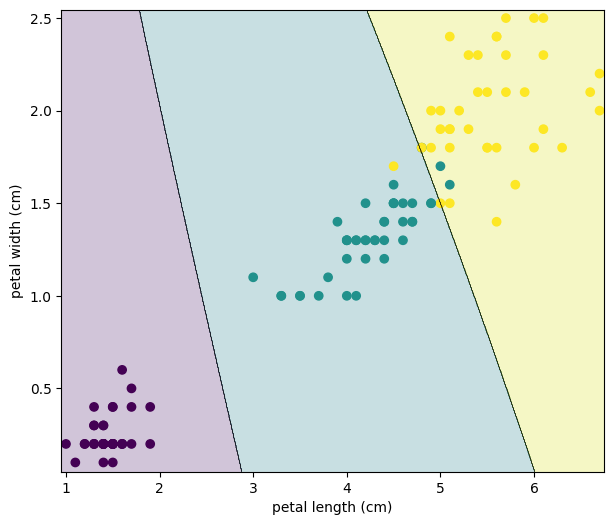

In [52]:
# Kernel SVM
# Explain using test accuracy
# ค่า gamma ที่เลือกล่าสุด คือ gamma = 0.1
test_accuracy = svm_clf.score(X_test, y_test)
print("Test accuracy =", test_accuracy)

# Explaing using decision boundary plot
plot_decision_boundary(svm_clf, X_train, y_train)

**Kernel SVM มีค่า test accuracy ที่แม่นยำสูงมาก และมีการแบ่ง decision boundary ที่เจาะจงรอบ ๆ กลุ่มของข้อมูลที่แบ่งได้ (เมื่อค่า gamma สูง)**

#### **ดังนั้น เลือกใช้ Linear SVM เนื่องจากข้อมูลที่มีอยู่ในตอนนี้มีจำนวนน้อย จึงทำให้การแบ่งกลุ่มดอกไม้ด้วย Linear SVM มีความเหมาะสมมากกว่า แม้ว่า Linear SVM จะมีค่า Test accuracy ที่น้อยกว่า Test accuracy ของ Kernel SVM ในตอนนี้ก็ตาม**